In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv("bank-full.csv") 

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,45,management,married,tertiary,no,523,yes,no,unknown,5,may,849,2,-1,0,unknown,no
110,29,services,divorced,secondary,no,31,yes,no,unknown,5,may,194,1,-1,0,unknown,no
111,46,technician,divorced,secondary,no,79,no,no,unknown,5,may,144,1,-1,0,unknown,no
112,56,self-employed,married,primary,no,-34,yes,yes,unknown,5,may,212,2,-1,0,unknown,no


In [4]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,114.00000,114.000000,114.0,114.000000,114.000000,114.0,114.0
mean,46.22807,567.535088,5.0,304.131579,1.105263,-1.0,0.0
std,10.20154,1734.765472,0.0,321.363233,0.335731,0.0,0.0
min,24.00000,-674.000000,5.0,13.000000,1.000000,-1.0,0.0
25%,38.25000,7.750000,5.0,160.000000,1.000000,-1.0,0.0
50%,46.50000,100.500000,5.0,211.500000,1.000000,-1.0,0.0
75%,55.00000,383.750000,5.0,326.000000,1.000000,-1.0,0.0
max,60.00000,12223.000000,5.0,1778.000000,3.000000,-1.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        114 non-null    int64 
 1   job        114 non-null    object
 2   marital    114 non-null    object
 3   education  114 non-null    object
 4   default    114 non-null    object
 5   balance    114 non-null    int64 
 6   housing    114 non-null    object
 7   loan       114 non-null    object
 8   contact    114 non-null    object
 9   day        114 non-null    int64 
 10  month      114 non-null    object
 11  duration   114 non-null    int64 
 12  campaign   114 non-null    int64 
 13  pdays      114 non-null    int64 
 14  previous   114 non-null    int64 
 15  poutcome   114 non-null    object
 16  y          114 non-null    object
dtypes: int64(7), object(10)
memory usage: 15.3+ KB


In [7]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Get the count of unique values in each column
unique_value_counts = data.nunique()

# Display the count of unique values for each column
print(unique_value_counts)
#This code will print out the count of unique values for each column in the dataset. It can help us to understand the diversity of values in each feature, which is useful for further analysis and preprocessing decisions.

age           36
job            9
marital        3
education      4
default        2
balance       96
housing        2
loan           2
contact        1
day            1
month          1
duration     100
campaign       3
pdays          1
previous       1
poutcome       1
y              2
dtype: int64


Lets Encode the data:

In [9]:
# Nominal label encoding for selected variables
nominal_label_encoding = {
    "job": {
        "admin.": 0,
        "blue-collar": 1,
        "entrepreneur": 2,
        "housemaid": 3,
        "management": 4,
        "retired": 5,
        "self-employed": 6,
        "services": 7,
        "student": 8,
        "technician": 9,
        "unemployed": 10,
        "unknown": 11
    },
    "marital": {
        "divorced": 0,
        "married": 1,
        "single": 2,
        "unknown": 3
    },
    "education": {
        "primary": 0,
        "secondary": 1,
        "tertiary": 2,
        "unknown": 3
    }
}

data.replace(nominal_label_encoding, inplace=True)

# One-hot encoding for remaining categorical variables
categorical_cols = ["default", "housing", "loan", "contact", "month", "poutcome"]
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the DataFrame after encoding
print(data_encoded.head())


   age  job  marital  education  balance  day  duration  campaign  pdays  \
0   58    4        1          2     2143    5       261         1     -1   
1   44    9        2          1       29    5       151         1     -1   
2   33    2        1          1        2    5        76         1     -1   
3   47    1        1          3     1506    5        92         1     -1   
4   33   11        2          3        1    5       198         1     -1   

   previous   y  default_yes  housing_yes  loan_yes  
0         0  no            0            1         0  
1         0  no            0            1         0  
2         0  no            0            1         1  
3         0  no            0            1         0  
4         0  no            0            0         0  


In [10]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,45,4,1,2,no,523,yes,no,unknown,5,may,849,2,-1,0,unknown,no
110,29,7,0,1,no,31,yes,no,unknown,5,may,194,1,-1,0,unknown,no
111,46,9,0,1,no,79,no,no,unknown,5,may,144,1,-1,0,unknown,no
112,56,6,1,0,no,-34,yes,yes,unknown,5,may,212,2,-1,0,unknown,no


In [11]:
data_encoded

,age,job,marital,education,balance,day,duration,campaign,pdays,previous,y,default_yes,housing_yes,loan_yes
0,58,4,1,2,2143,5,261,1,-1,0,no,0,1,0
1,44,9,2,1,29,5,151,1,-1,0,no,0,1,0
2,33,2,1,1,2,5,76,1,-1,0,no,0,1,1
3,47,1,1,3,1506,5,92,1,-1,0,no,0,1,0
4,33,11,2,3,1,5,198,1,-1,0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,45,4,1,2,523,5,849,2,-1,0,no,0,1,0
110,29,7,0,1,31,5,194,1,-1,0,no,0,1,0
111,46,9,0,1,79,5,144,1,-1,0,no,0,0,0
112,56,6,1,0,-34,5,212,2,-1,0,no,0,1,1


In [12]:
data_encoded.describe()

,age,job,marital,education,balance,day,duration,campaign,pdays,previous,default_yes,housing_yes,loan_yes
count,114.00000,114.000000,114.000000,114.000000,114.000000,114.0,114.000000,114.000000,114.0,114.0,114.000000,114.000000,114.000000
mean,46.22807,4.210526,1.061404,1.254386,567.535088,5.0,304.131579,1.105263,-1.0,0.0,0.017544,0.859649,0.201754
std,10.20154,3.270879,0.599190,0.807174,1734.765472,0.0,321.363233,0.335731,0.0,0.0,0.131866,0.348884,0.403082
min,24.00000,0.000000,0.000000,0.000000,-674.000000,5.0,13.000000,1.000000,-1.0,0.0,0.000000,0.000000,0.000000
25%,38.25000,1.000000,1.000000,1.000000,7.750000,5.0,160.000000,1.000000,-1.0,0.0,0.000000,1.000000,0.000000
50%,46.50000,4.000000,1.000000,1.000000,100.500000,5.0,211.500000,1.000000,-1.0,0.0,0.000000,1.000000,0.000000
75%,55.00000,7.000000,1.000000,2.000000,383.750000,5.0,326.000000,1.000000,-1.0,0.0,0.000000,1.000000,0.000000
max,60.00000,11.000000,2.000000,3.000000,12223.000000,5.0,1778.000000,3.000000,-1.0,0.0,1.000000,1.000000,1.000000


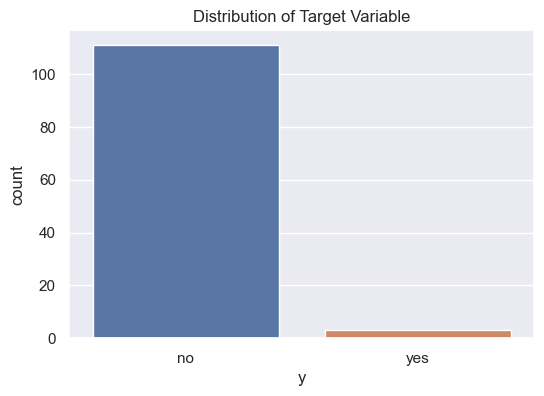

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data_encoded)
plt.title("Distribution of Target Variable")
plt.show()

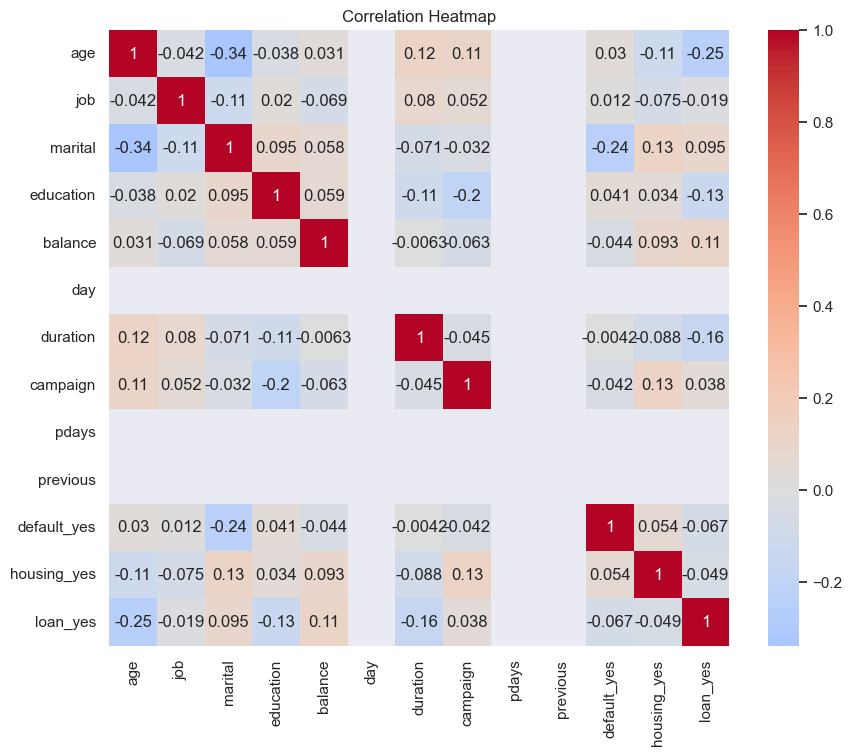

In [14]:
# Visualize correlations between numerical variables
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

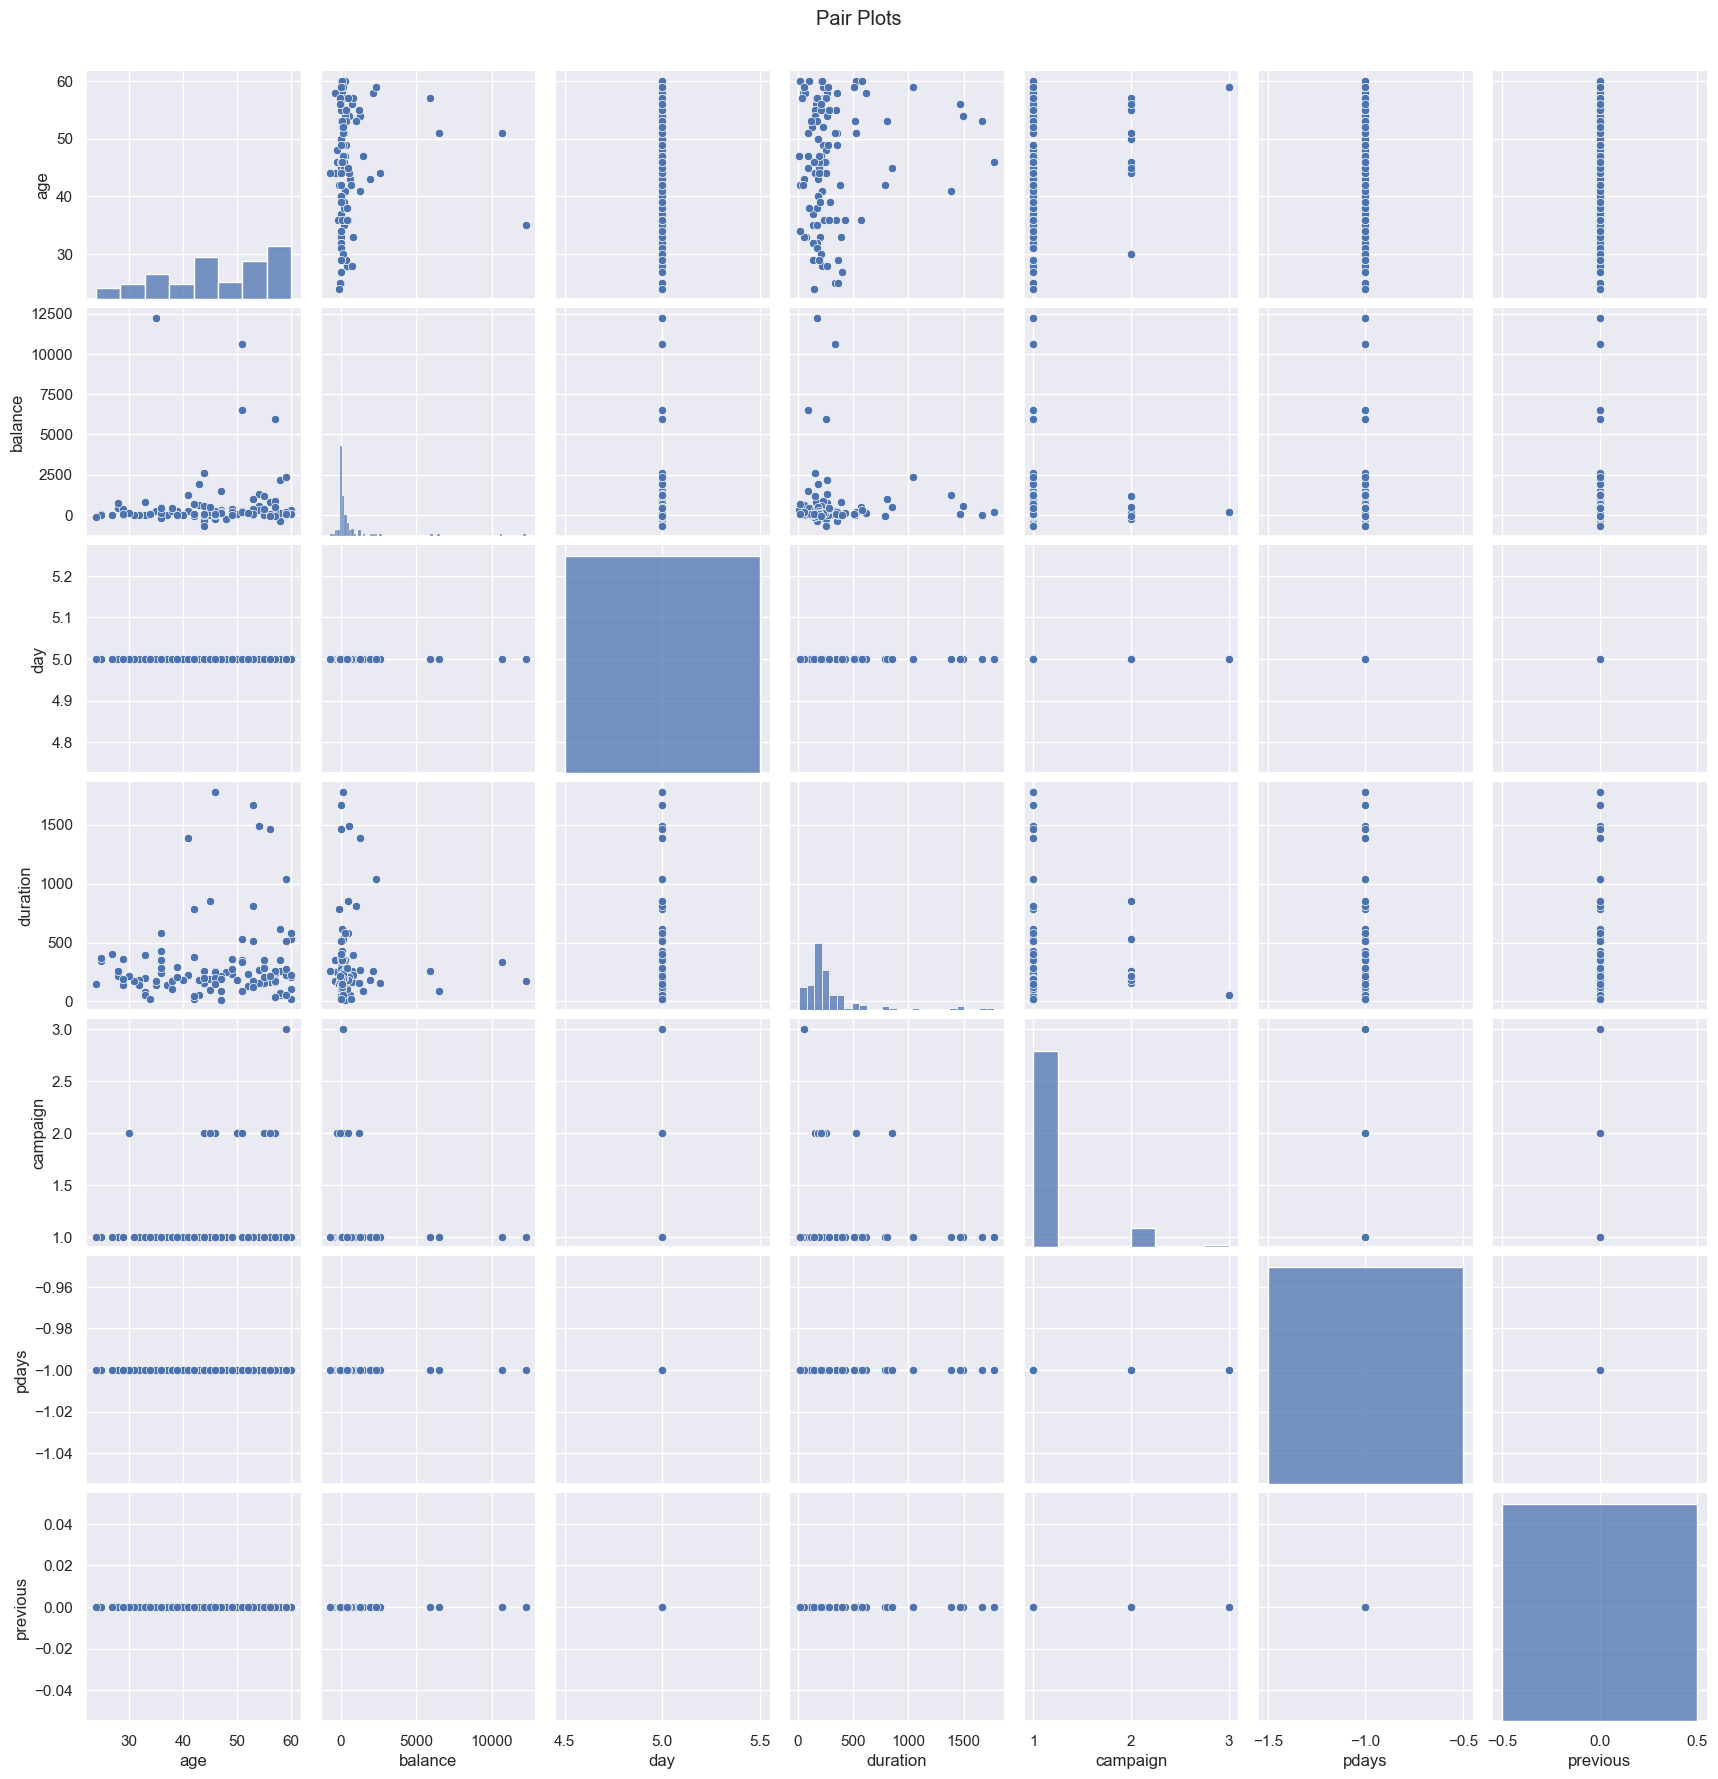

In [15]:
# Create pair plots to visualize relationships between numerical variables
sns.pairplot(data_encoded, vars=["age", "balance", "day", "duration", "campaign", "pdays", "previous"])
plt.suptitle("Pair Plots", y=1.02)
plt.show()

Model Creation

In [16]:
data_encoded

,age,job,marital,education,balance,day,duration,campaign,pdays,previous,y,default_yes,housing_yes,loan_yes
0,58,4,1,2,2143,5,261,1,-1,0,no,0,1,0
1,44,9,2,1,29,5,151,1,-1,0,no,0,1,0
2,33,2,1,1,2,5,76,1,-1,0,no,0,1,1
3,47,1,1,3,1506,5,92,1,-1,0,no,0,1,0
4,33,11,2,3,1,5,198,1,-1,0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,45,4,1,2,523,5,849,2,-1,0,no,0,1,0
110,29,7,0,1,31,5,194,1,-1,0,no,0,1,0
111,46,9,0,1,79,5,144,1,-1,0,no,0,0,0
112,56,6,1,0,-34,5,212,2,-1,0,no,0,1,1


training and testing

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (79, 13)
X_test shape: (35, 13)
y_train shape: (79,)
y_test shape: (35,)


Logistics Regression using ScikitLearn

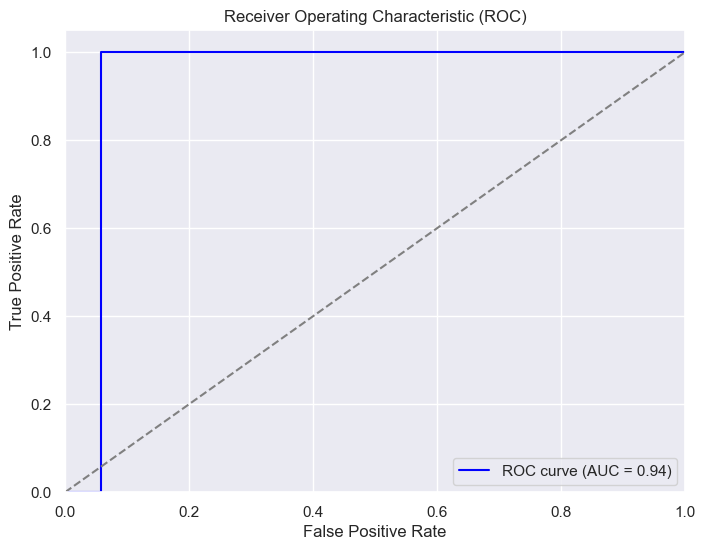

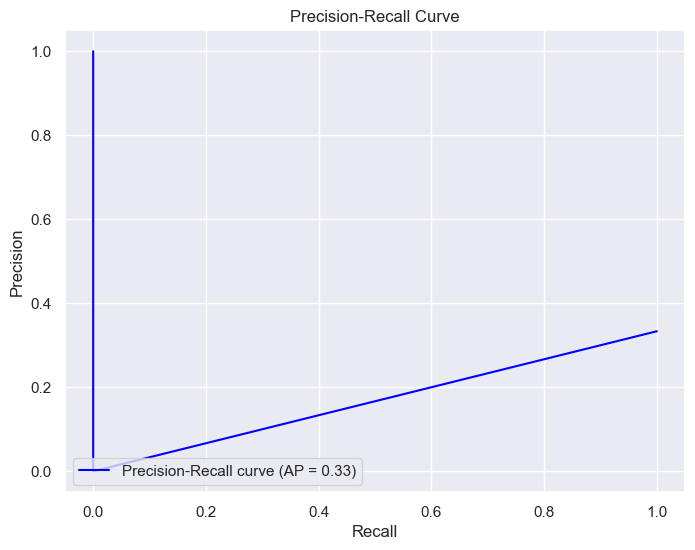

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Convert target variable to binary format: 'no' to 0, 'yes' to 1
y_test_binary = y_test.map({'no': 0, 'yes': 1})

# Calculate predicted probabilities for positive class
y_test_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_prob)
roc_auc = roc_auc_score(y_test_binary, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test_binary, y_test_prob)
avg_precision = average_precision_score(y_test_binary, y_test_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


Evaluation Of Model

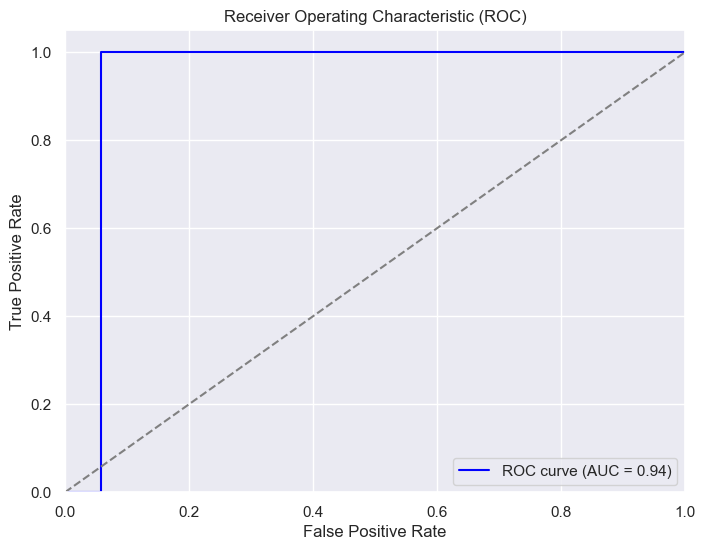

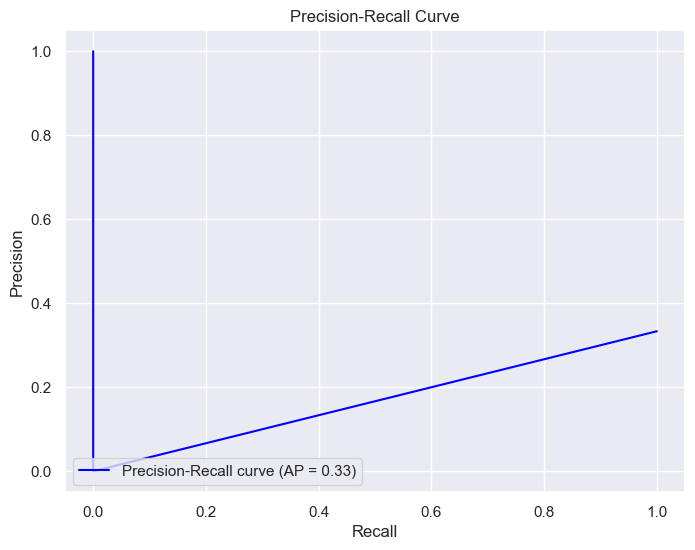

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Convert target variable to binary format: 'no' to 0, 'yes' to 1
y_test_binary = y_test.map({'no': 0, 'yes': 1})

# Calculate predicted probabilities for positive class
y_test_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_prob)
roc_auc = roc_auc_score(y_test_binary, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test_binary, y_test_prob)
avg_precision = average_precision_score(y_test_binary, y_test_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


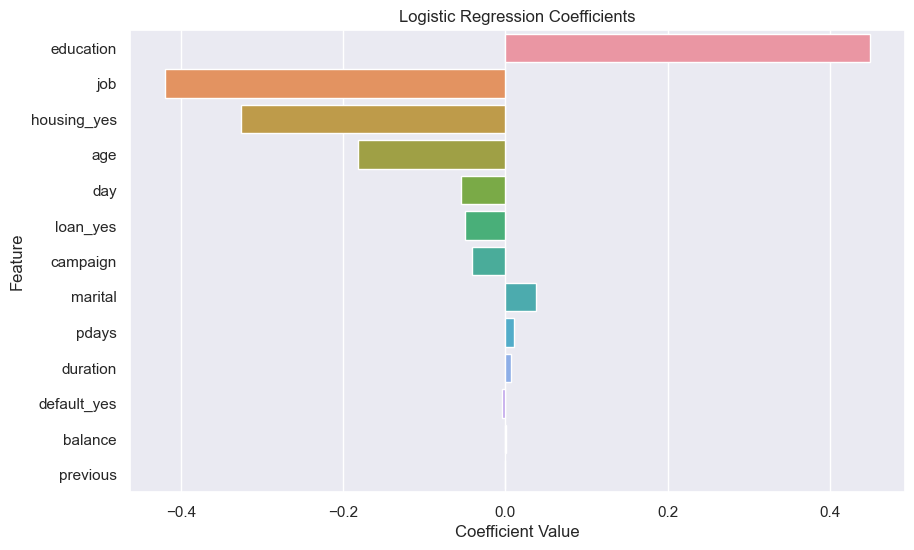

In [23]:
# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to store coefficients and feature names
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value for visualization
coeff_df['Abs_Coefficient'] = abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficient values
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [27]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'default_yes', 'housing_yes',
       'loan_yes'],
      dtype='object')

Model Deployment

In [29]:
# Example data for prediction
example_data = {
    "age": [30, 40, 50],
    "job": [4, 1, 9],  # Use the encoded job values
    "marital": [1, 2, 1],  # Use the encoded marital values
    "education": [1, 2, 2],  # Use the encoded education values
    "balance": [2000, 1000, 500],
    "day": [15, 20, 10],
    "duration": [150, 200, 100],
    "campaign": [2, 1, 3],
    "pdays": [-1, 100, -1],
    "previous": [0, 1, 0],
    "default_yes": [0, 0, 0],
    "housing_yes": [0, 1, 0],
    "loan_yes": [0, 0, 1],
}

# Convert example data to a DataFrame
example_df = pd.DataFrame(example_data)

# Make predictions using the trained model
predictions = logreg_model.predict(example_df)

# Convert predictions to 'yes' or 'no'
predictions_readable = ['yes' if p == 1 else 'no' for p in predictions]

# Add predictions to the example data DataFrame
example_df['predictions'] = predictions_readable

# Display the example data with predictions
print(example_df)


   age  job  marital  education  balance  day  duration  campaign  pdays  \
0   30    4        1          1     2000   15       150         2     -1   
1   40    1        2          2     1000   20       200         1    100   
2   50    9        1          2      500   10       100         3     -1   

   previous  default_yes  housing_yes  loan_yes predictions  
0         0            0            0         0          no  
1         1            0            1         0          no  
2         0            0            0         1          no  
